In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D , Convolution2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import metrics
from io import BytesIO 
import seaborn as sns; sns.set()
import tensorflow
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import cohen_kappa_score , matthews_corrcoef , classification_report , roc_auc_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
import keras
from sklearn.model_selection import train_test_split
import cv2

Using TensorFlow backend.


In [2]:
directory_1 = r"C:\Users\Abinaya Ravichandran\Desktop\Fall 2020\ECE613\Research Project\Detecting_Covid19_CT_Scan\COVID"
directory_2 = r"C:\Users\Abinaya Ravichandran\Desktop\Fall 2020\ECE613\Research Project\Detecting_Covid19_CT_Scan\NORMAL"

x_ = list()
y = list()
IMG_SIZE = 224
c = 0
nc = 0

"COVID Dataset"
for filename in os.listdir(directory_1):
    if filename.endswith(".png") or filename.endswith(".jpg"):
#       print(os.path.join(directory, filename))
        try:
            path = os.path.join(directory_1, filename)
            img = cv2.imread(path)
            img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            img_arr = np.asarray(img_)
            x_.append(img_arr)
            label = 0
            c = c+1
        except:
            None

"NORMAL Dataset"
for filename in os.listdir(directory_2):
    if filename.endswith(".png") or filename.endswith(".jpg"):
#       print(os.path.join(directory, filename))
        try:
            path = os.path.join(directory_2, filename)
            img = cv2.imread(path)
            img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            img_arr = np.asarray(img_)
            x_.append(img_arr)
            label = 1
            nc = nc+1
        except:
            None

x1=[]
for item in x_:
    if len(item.shape) > 2 and item.shape[2] == 4:
        item = cv2.cvtColor(item, cv2.COLOR_BGRA2BGR)
    x1.append(item)
    
Y = []

for i in range(350):
    Y.append(1)
# print(Y)
for i in range(350):
    Y.append(0)
# print(Y)    
X = np.asarray(x1)
y = np.asarray(Y)
y = to_categorical(y,num_classes = 2)
# print(X.shape)

In [4]:
X_train,x_test,y_train,y_test = train_test_split(*shuffle(X, y),test_size = 0.10,random_state = 42)
X_train,x_val,y_train,y_val = train_test_split(*shuffle(X_train, y_train),test_size = 0.10,random_state = 42)

In [5]:
def print_confusion_matrix():
    matrix = confusion_matrix(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1))
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(matrix,cmap='Blues',linecolor='white',linewidths=1,annot=True,fmt='d')
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_model_accuracy_loss():
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy (Train)')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy (Val)')
    plt.plot(history.history['loss'], 'r--', label='Loss of (Train)')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of (Val)')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylim(0)
    plt.legend()
    plt.show()

def print_performance_metrics():
    print('Accuracy (Test):', np.round(metrics.accuracy_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('Precision Score:', np.round(metrics.precision_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('Recall Score:', np.round(metrics.recall_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('ROC AUC:',np.round(roc_auc_score(y_test.argmax(axis=1),max_y_pred_test.argmax(axis=1)),4)) 
    print( metrics.classification_report(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)))

### VGG19 with 1 CNN layer

In [5]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model1 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
    layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model1.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history= model1.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 481 samples, validate on 54 samples
Epoch 1/20
481/481 [==============================] - 62s 130ms/step - loss: 0.6195 - accuracy: 0.6247 - val_loss: 0.6405 - val_accuracy: 0.6481
Epoch 2/20
481/481 [==============================] - 68s 141ms/step - loss: 0.4393 - accuracy: 0.7817 - val_loss: 0.5633 - val_accuracy: 0.8241
Epoch 3/20
481/481 [==============================] - 66s 137ms/step - loss: 0.3606 - accuracy: 0.8378 - val_loss: 0.5636 - val_accuracy: 0.8056
Epoch 4/20
481/481 [==============================] - 67s 140ms/step - loss: 0.3358 - accuracy: 0.8067 - val_loss: 0.5514 - val_accuracy: 0.7315
Epoch 5/20
481/481 [==============================] - 68s 142ms/step - loss: 0.3299 - accuracy: 0.7703 - val_loss: 0.5428 - val_accuracy: 0.6204
Epoch 6/20
481/481 [==============================] - 69s 143ms/step - loss: 0.3357 - accuracy: 0.7474 - val_loss: 0.5738 - val_accuracy: 0.6019
Epoch 7/20
481/481 [==============================] - 66s 138ms/step - loss: 0.3154 -

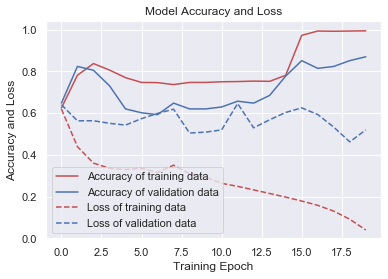

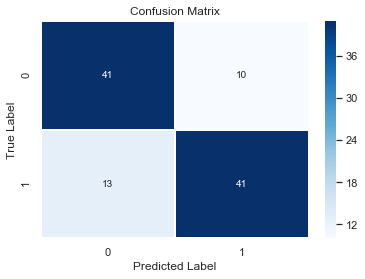

Accuracy: 0.781
Precision: 0.7822
Recall: 0.781
F1 Score: 0.781
Cohen Kappa Score: 0.5623
Matthews Corrcoef: 0.5632
ROC AUC: 0.7816
		Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        51
           1       0.80      0.76      0.78        54

    accuracy                           0.78       105
   macro avg       0.78      0.78      0.78       105
weighted avg       0.78      0.78      0.78       105



In [6]:
y_pred_test = model1.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

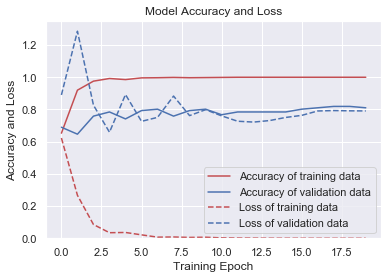

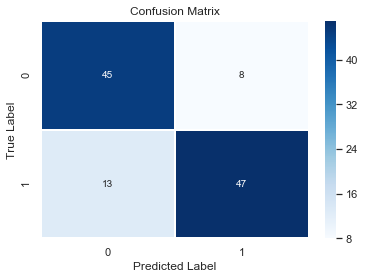

Accuracy: 0.8142
Precision: 0.8176
Recall: 0.8142
F1 Score: 0.8143
Cohen Kappa Score: 0.6289
Matthews Corrcoef: 0.6314
ROC AUC: 0.8162
		Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.85      0.78      0.82        60

    accuracy                           0.81       113
   macro avg       0.82      0.82      0.81       113
weighted avg       0.82      0.81      0.81       113



In [9]:
y_pred_test = model1.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

# Data Augmentation

## Augmentation techniques with Keras ImageDataGenerator class

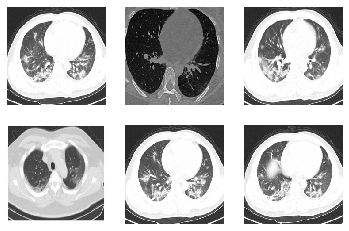

In [10]:
"Original Image"
directory = r"C:\Users\Abinaya Ravichandran\Desktop\Fall 2020\ECE613\Research Project\Detecting_Covid19_CT_Scan\COVID"
path = os.path.join(directory, '1.png')
path1 = os.path.join(directory, '6.png')
path2 = os.path.join(directory, '3.png')
path3 = os.path.join(directory, '4.png')
path4 = os.path.join(directory, '2.png')
path5 = os.path.join(directory, '5.png')

img = cv2.imread(path)
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)

img_ = cv2.resize(img,(224,224))
img_1 = cv2.resize(img1,(224,224))
img_2 = cv2.resize(img2,(224,224))
img_3 = cv2.resize(img3,(224,224))
img_4 = cv2.resize(img4,(224,224))
img_5 = cv2.resize(img5,(224,224))

img_arr = np.asarray(img_)
img_arr1 = np.asarray(img_1)
img_arr2 = np.asarray(img_2)
img_arr3 = np.asarray(img_3)
img_arr4 = np.asarray(img_4)
img_arr5 = np.asarray(img_5)

fig = plt.figure()

plt.subplot(2, 3, 1)
plt.imshow(img_)
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(img_1)
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(img_2)
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(img_3)
plt.axis("off")
plt.subplot(2, 3, 5)
plt.imshow(img_4)
plt.axis("off")
plt.subplot(2, 3, 6)
plt.imshow(img_5)
plt.axis("off")
plt.show()


# plt.imshow(img_)
# plt.axis("off")
# plt.show()
# print(type(img_))
# print(img_.shape)

### 1. Random Rotations

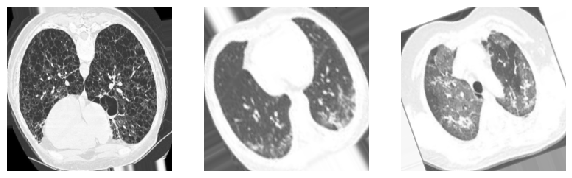

In [58]:
# # ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# # iterator
datagen.fit(X_train)
aug_iter = datagen.flow(X_train, batch_size=3)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')


### 2. Random Shifts

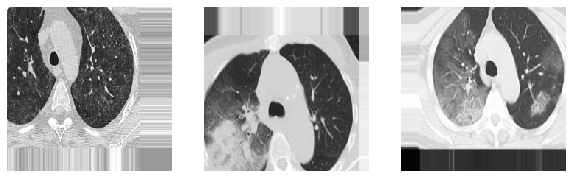

In [60]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# # iterator
datagen.fit(X_train)
aug_iter = datagen.flow(X_train, batch_size=3)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

### 3. Random Flips

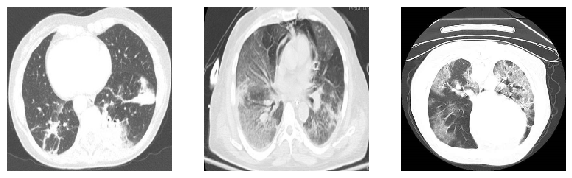

In [62]:
# ImageDataGenerator flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# # iterator
datagen.fit(X_train)
aug_iter = datagen.flow(X_train, batch_size=3)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

### 4. Random Brightness

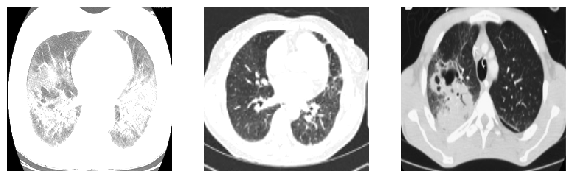

In [66]:
# ImageDataGenerator brightness
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

# # iterator
datagen.fit(X_train)
aug_iter = datagen.flow(X_train, batch_size=3)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

### 5. Random Zoom

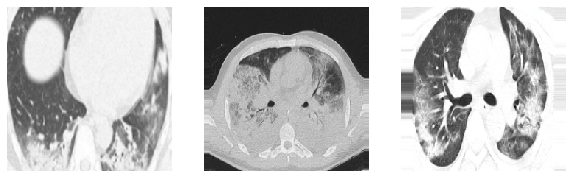

In [65]:
# ImageDataGenerator zoom
datagen = ImageDataGenerator(zoom_range=0.2)

# # iterator
datagen.fit(X_train)
aug_iter = datagen.flow(X_train, batch_size=3)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

### ImageDataGenerator Method

In [7]:
data_generator = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.05, 
                              width_shift_range = 0.02, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range = 0.2) 

In [11]:
history = model1.fit(data_generator.flow(X_train, y_train, batch_size=32,shuffle=False),
                    epochs=20,
                    steps_per_epoch= len(X_train) / 32,
                    validation_data=(X_train, y_train),
                    verbose=1)

Epoch 1/20
17/16 [==============================] - 128s 8s/step - loss: 0.1059 - accuracy: 0.9589 - val_loss: 0.0283 - val_accuracy: 0.9916
Epoch 2/20
17/16 [==============================] - 131s 8s/step - loss: 0.1045 - accuracy: 0.9579 - val_loss: 0.0155 - val_accuracy: 0.9963
Epoch 3/20
17/16 [==============================] - 129s 8s/step - loss: 0.0740 - accuracy: 0.9748 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 4/20
17/16 [==============================] - 130s 8s/step - loss: 0.0904 - accuracy: 0.9607 - val_loss: 0.0245 - val_accuracy: 0.9907
Epoch 5/20
17/16 [==============================] - 130s 8s/step - loss: 0.0833 - accuracy: 0.9692 - val_loss: 0.0216 - val_accuracy: 0.9897
Epoch 6/20
17/16 [==============================] - 130s 8s/step - loss: 0.0535 - accuracy: 0.9785 - val_loss: 0.0104 - val_accuracy: 0.9963
Epoch 7/20
17/16 [==============================] - 130s 8s/step - loss: 0.0538 - accuracy: 0.9748 - val_loss: 0.0531 - val_accuracy: 0.9785
Epoch 8/20
17

In [47]:
# # y_pred_test = model1.predict(x_test)
# max_y_pred_test = np.round(y_pred_test)
# # print(y_pred_test)
# # print(max_y_pred_test)
# # [thing for thing in list_of_things]
# # for y in range(5):
# #     print(y_test[y])
# #     print(max_y_pred_test[y])
# # print('Accuracy:', np.round(metrics.accuracy_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
# print(type(y_test))
# # print(max_y_pred_test)
# # print(metrics.accuracy_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)))

<class 'numpy.ndarray'>


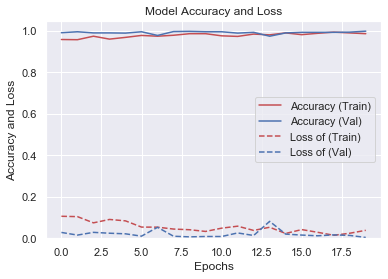

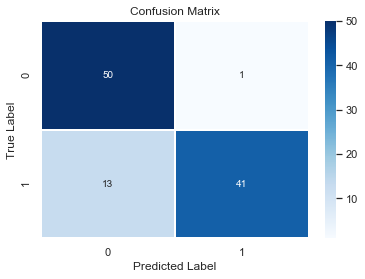

Accuracy (Test): 0.8667
Precision Score: 0.8875
Recall Score: 0.8667
F1 Score: 0.8654
ROC AUC: 0.8698
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        51
           1       0.98      0.76      0.85        54

    accuracy                           0.87       105
   macro avg       0.88      0.87      0.87       105
weighted avg       0.89      0.87      0.87       105



In [65]:
# # y_test = [1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0
# #  0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1
# #  1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1]
# max_y_pred = [
# [0,1],
# [0,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]
# ,[1,1]
# ,[0,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]
# ,[0,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]
# ,[0,0]
# ,[1,0]
# ,[1,1]
# ,[0,0]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[1,0]
# ,[0,1]
# ,[1,0]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]
# ,[0,1]
# ,[0,1]
# ,[1,1]
# ,[1,1]
# ,[1,1]
# ,[0,1]]


# max_y_pred_test = np.array(max_y_pred)
# # print(max_y_pred_test.argmax(axis=1))
# plot_model_accuracy_loss()
# print_confusion_matrix()
# print_performance_metrics()

y_pred_test = model1.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()